In [38]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sales = pd.read_csv('top100videogamesales.csv')

In [9]:
sales.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00


1)Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales. 

Text(0.5, 1.0, 'Regional Sales by Publisher')

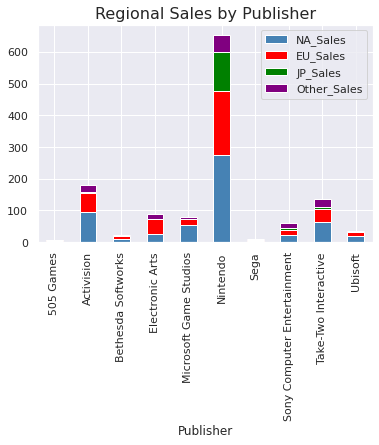

In [51]:
#Create new pandas dataframe 
sales_by_region = sales[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df2 = sales_by_region.groupby(['Publisher']).sum()
#changes the publisher index back into a column rather than being an index
df3=df2.reset_index()
#Overrides default chart designs
df3.set_index('Publisher').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'green', 'purple'])
#add overall title
plt.title('Regional Sales by Publisher', fontsize=16)

I created this chart by first creating a separate dataframe where the sales for each region was grouped by the publisher. I then used the set_index() function to create a stacked bar plot which shows that Nintendo had the most sales. Sega and 505 Games had the least sales. 

2) Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

Text(0.5, 1.0, 'Global Sales by Year')

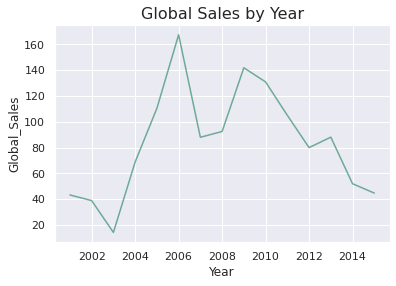

In [53]:
sales_per_year = sales[['Year','Global_Sales']]
sales_per_year = sales_per_year.groupby(['Year']).sum().reset_index()
#Overrides default chart designs
sns.lineplot(data=sales_per_year,x='Year',y='Global_Sales', color=(0.3, 0.6, 0.5, 0.8))
plt.title('Global Sales by Year', fontsize=16)

To create this line graph, I first created a separate dataframe with just the Year information and global sales information from the sales dataframe. Then grouped the global sales by the years and put the summary of that information into another dataset. I then used this dataset to plot the line chart above. The results from the chart show that global sales increased drastically between 2003 and 2004 where they reached their peak. But then sales decreased in 2007 and then increased but then steadily declined from 2009. 

3) Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

Text(0.5, 0, 'Global Sales')

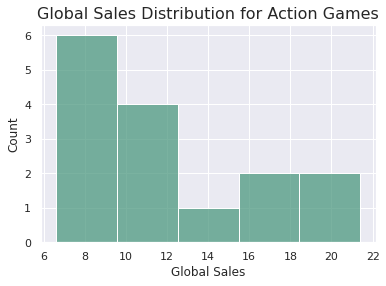

In [54]:
#Dataframe with sales where the genre was 'action'
action_sales = sales.loc[sales['Genre']=='Action']
#Overrides default chart design
sns.histplot(data=action_sales, x = 'Global_Sales', color=(0.3, 0.6, 0.5, 0.8))
plt.title('Global Sales Distribution for Action Games', fontsize=16)
plt.xlabel('Global Sales')

To create this histogram, I first created a separate dataframe that had all the sales where the genre was 'Action'. Then I used sns.histplot() to create a histogram to illustrate the distribution of the global sales where the genre was 'Action'.  The chart shows that most global sales are between 7 and 10, and the minority of the sales are between 13 and 16.  

4) North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart). Detail what is included in the other category. Explain the chart using markdown.

In [55]:
sales_NA = sales[['Genre','NA_Sales']]
#groups the sales by genre and sorts the genres from those with the highest to the least number of sales
sales_NA= sales_NA.groupby(['Genre']).sum().reset_index().sort_values(by='NA_Sales',ascending=False)
#Extracts the top 4 genres and the remaining genres into separate data sets
top_5 = sales_NA[:4]
other_categories = sales_NA[:3:-1]

#NA_sales total for other categories
other_total = other_categories['NA_Sales'].sum()

top_5.loc[-1] = ['Other', other_total]  # adding a row
top_5.index = top_5.index + 1  # shifting index
other_categories

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Genre,NA_Sales
4,Puzzle,3.44
1,Fighting,14.40
8,Simulation,14.61
6,Role-Playing,50.48
3,Platform,52.67
5,Racing,56.45


Text(0, 0.5, 'North American Sales')

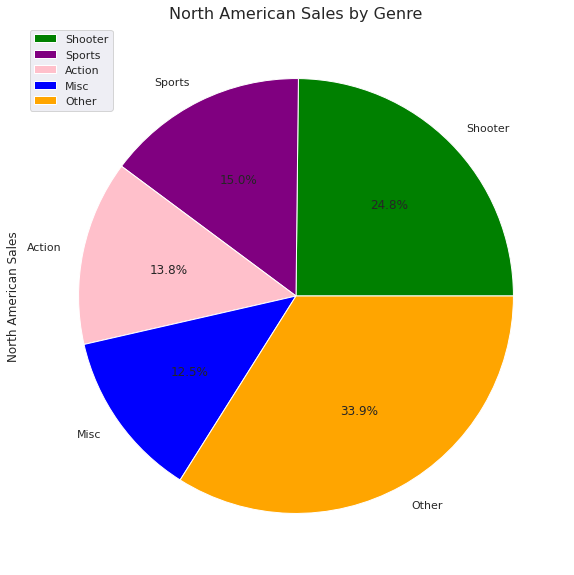

In [50]:
#Plotting the pie chart
labels = top_5['Genre']
#Overrides default chart designs
top_5.plot.pie(y='NA_Sales',autopct="%.1f%%", labels = labels,figsize=(10, 10), colors = ['green', 'purple', 'pink', 'blue', 'orange'])
plt.title('North American Sales by Genre', fontsize=16)
plt.ylabel('North American Sales')

This chart shows the North American sales by genre. The 'Other' category is made up of the following genres - Puzzle, Fighting, Simulation, Role-Playing, Platform, Racing. Most of the North American sales come from the aggregation of these genres. The second highest number of sales comes from the 'Shooter' genre. 

5)European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

In [56]:
sales_EU = sales[['Genre','EU_Sales']]
#groups the sales by genre and sorts the genres from those with the highest to the least number of sales
sales_EU= sales_EU.groupby(['Genre']).sum().reset_index().sort_values(by='EU_Sales',ascending=False)
#Extracts the top 4 genres and the remaining genres into separate data sets
top_5 = sales_EU[:4]
other_categories = sales_EU[:3:-1]

#NA_sales total for other categories
other_total = other_categories['EU_Sales'].sum()

top_5.loc[-1] = ['Other', other_total]  # adding a row
top_5.index = top_5.index + 1  # shifting index
other_categories

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Genre,EU_Sales
1,Fighting,5.00
4,Puzzle,5.36
8,Simulation,23.26
3,Platform,33.12
6,Role-Playing,36.20
5,Racing,44.03


Text(0, 0.5, 'European Sales')

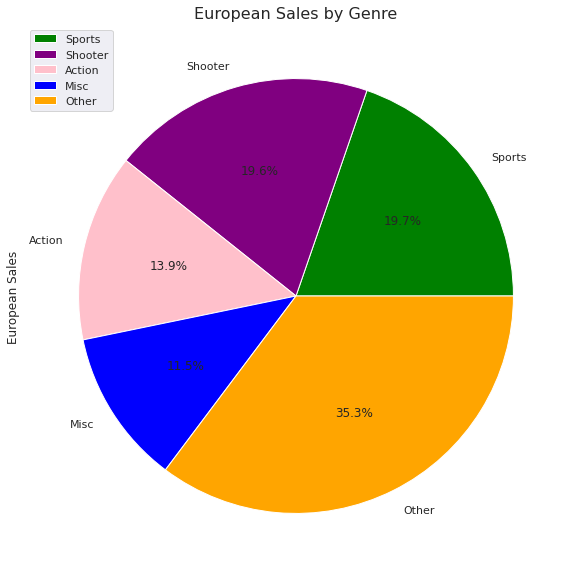

In [57]:
#Plotting the pie chart
labels = top_5['Genre']
#Overrides default chart designs
top_5.plot.pie(y='EU_Sales',autopct="%.1f%%", labels = labels,figsize=(10, 10), colors = ['green', 'purple', 'pink', 'blue', 'orange'])
plt.title('European Sales by Genre', fontsize=16)
plt.ylabel('European Sales')

This chart shows the European sales by genre. The 'Other' category is made up of the following genres - Fighting, Puzzle, Simulation, Platform, Role-Playing, Racing. Most of the European sales come from the aggregation of these genres. The second highest number of sales comes from the 'Sports' genre.

6) Explain differences and similarities between the North American and European charts in markdown.

The two above charts are similar in that the 'Sports' and 'Shooter' genre video game sales make up the majority of the sales for both Europe and North America. One difference is that sales in the 'Shooter' genre are higher in North America than they are in Europe. 

7) Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

Text(0, 0.5, 'Number of Games')

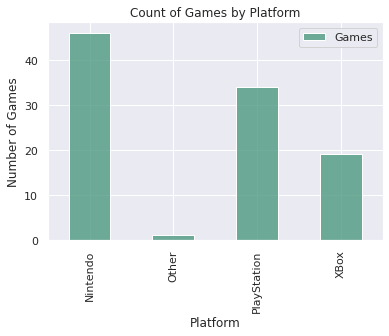

In [58]:
platforms = sales[['Platform','Name']]
platforms = platforms.groupby(['Platform']).size()
platforms = platforms.reset_index().set_index('Platform')
platforms = platforms.rename(columns={0: 'Games'})
#Overrides default chart design
platforms.plot(kind="bar", color=(0.3, 0.6, 0.5, 0.8))
plt.title('Count of Games by Platform')
plt.ylabel('Number of Games')

The results show that Nintendo has the most games created per platform, followed by Playstation. The 'Other' category has the least number total games. 

Exceeds Expectations Questions: 
Determine the appropriate charts to answer the following questions
1a)What genre of game is present the most in the top 100 games from 2000-2015?

Text(0, 0.5, 'Number of Games')

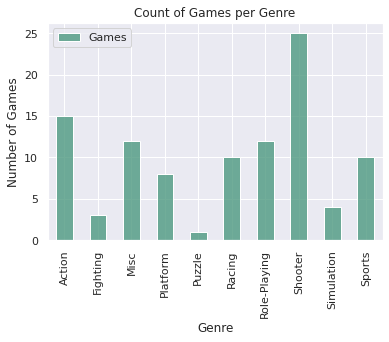

In [59]:
genres = sales[['Genre','Name']]
genres= genres.groupby(['Genre']).size()
genres = genres.reset_index().set_index('Genre')
genres= genres.rename(columns={0: 'Games'})
#Overrides default chart design
genres.plot(kind="bar", color=(0.3, 0.6, 0.5, 0.8))
plt.title('Count of Games per Genre')
plt.ylabel('Number of Games')

I think a bar chart is one of the best charts to display this data. Using a bar chart, it's easy to see that the "Shooter" genre is most present in the top 100 game sales.  

2) What percentage of global sales does PlayStation have in the dataset?

In [61]:
sales_global = sales[['Platform','Global_Sales']]
#groups the sales by platform and sorts the platforms from those with the highest to the least number of global sales
sales_global= sales_global.groupby(['Platform']).sum().reset_index().sort_values(by='Global_Sales',ascending=False)
#Extracts the top 4 platforms and the remaining platforms into separate data sets
top_5 = sales_global[:4]
top_5

,Platform,Global_Sales
0,Nintendo,702.01
2,PlayStation,342.67
3,XBox,212.47
1,Other,8.11


Text(0, 0.5, 'Global Sales')

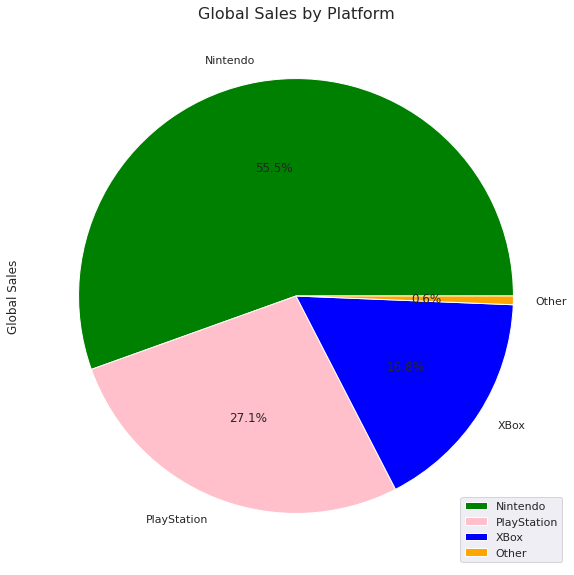

In [62]:
#Plotting the pie chart
labels = top_5['Platform']
# Overrides the default chart designs
top_5.plot.pie(y='Global_Sales',autopct="%.1f%%", labels = labels,figsize=(10, 10), colors = ['green', 'pink', 'blue', 'orange'])
plt.title('Global Sales by Platform', fontsize=16)
plt.ylabel('Global Sales')

I think a pie chart is the best chart to show the percentage of global sales that Playstation has. The answer is that PlayStation has 27.1% of global sales in the dataset. 

3) What is the distribution of sales for Shooter games?

Text(0.5, 0, 'Total Sale Amount')

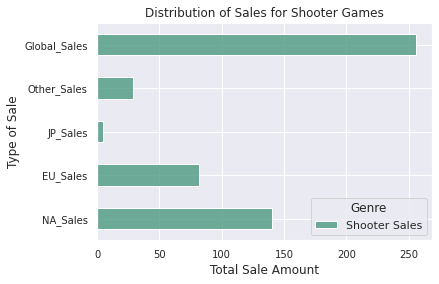

In [63]:
#Filters by the shooter genre and then create a horizontal bar plot
sales_shooter = sales[sales['Genre']=='Shooter']

sales_shooter = sales_shooter[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
sales_shooter = sales_shooter.groupby('Genre').sum()
sales_shooter = sales_shooter.transpose()
sales_shooter=sales_shooter.rename(columns={'Shooter': 'Shooter Sales'})
# Overrides the default chart designs
sales_shooter.plot(kind="barh", fontsize=10, color=(0.3, 0.6, 0.5, 0.8))
plt.ylabel('Type of Sale')
plt.title('Distribution of Sales for Shooter Games')
plt.xlabel('Total Sale Amount')

The chart shows that global sales made up the most sales in the "Shooter' genre. Japan sales made up the least. 